importing Jupyter notebook from NLP.ipynb
importing Jupyter notebook from ML_trial.ipynb
importing Jupyter notebook from EDA1.ipynb
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
KNN: 0.7072994561522774 , RandomForest: 0.7072994561522774 , LogisticRegression 0.7072994561522774


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/moulyanaveenachoday/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


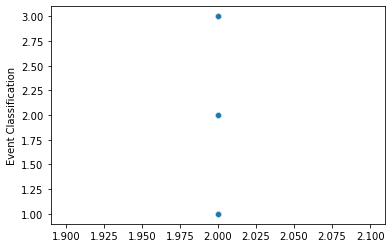

In [1]:
import import_ipynb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.model_selection import validation_curve
import NLP, ML_trial, EDA1

In [2]:
#Balancing the data
X = NLP.X
y = EDA1.df['Event Classification']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<AxesSubplot:ylabel='Event Classification'>

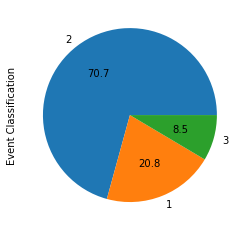

In [4]:
y.value_counts().plot.pie(autopct='%.1f')

In [5]:
#over sample minority class and under sample majority class with smote 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
oversample = SMOTE()
undersample = RandomUnderSampler()
s = [("o", oversample),("u", undersample)]
pipeline = Pipeline(steps=s)
X_train,y_train = pipeline.fit_resample(X_train, y_train)

In [6]:
c = Counter(y_train)
for k,v in c.items():
    dist = v/len(y)*100
    print(f"class={k},n={v} ({dist}%)")

class=1,n=38978 (49.68451644975845%)
class=2,n=38978 (49.68451644975845%)
class=3,n=38978 (49.68451644975845%)


<AxesSubplot:ylabel='Event Classification'>

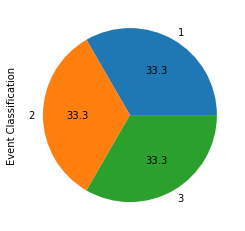

In [7]:
y_train.value_counts().plot.pie(autopct='%.1f')

In [8]:
knn, rf, lor, kfold = KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression(max_iter=30000), KFold(3)

In [9]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [10]:
# knn_model = RandomizedSearchCV(knn, {'n_neighbors':[5,10,15]}, cv=kfold, scoring=accuracy_score)
# rf_model = RandomizedSearchCV(rf, {'n_estimators':[20,50,100,200]}, cv=kfold, scoring=accuracy_score)
# lor_model = RandomizedSearchCV(lor, {'max_iter':30000}, cv=kfold, scoring=accuracy_score)

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
lor.fit(X_train,y_train)

LogisticRegression(max_iter=30000)

Five most important features according to RandomForestClassifier

In [14]:
imp_feat = rf.feature_importances_.argsort()[-5:]
[NLP.vect_df.columns[i] for i in imp_feat]

['ibuprofen', 'baxter', 'ampt', 'consolidated', 'observing']

In [15]:
#prediction for test
knn_yhat = knn.predict(X_test)
rf_yhat = rf.predict(X_test)
lor_yhat = lor.predict(X_test)

In [17]:
#prediction for train
#knn_trainp = knn.predict(X_train)
#rf_trainp = rf.predict(X_train)
#lor_trainp = lor.predict(X_train)

In [ ]:
#accuracy before hyperparameter tuning 
print('KNN:',accuracy_score(y_test,knn_yhat), 'RandomForest',accuracy_score(y_test, rf_yhat), 'Logistic Regression',accuracy_score(y_test, lor_yhat))